# Hugging Face Diffusers Library

> **Note**: This notebook is adapted from the official Diffusers repository: https://github.com/huggingface/notebooks/blob/main/diffusers/diffusers_intro.ipynb. Content has been curated for minicourse participants. For comprehensive details, consult the original documentation.

![diffusers_library](https://github.com/huggingface/diffusers/raw/main/docs/source/en/imgs/diffusers_library.jpg)

## Introduction

Diffusion models have become state-of-the-art for high-quality image generation, surpassing GANs and powering systems like [DALL-E 2](https://openai.com/dall-e-2/) and [Imagen](https://imagen.research.google/). However, implementation complexity has limited widespread adoption.

The Hugging Face `diffusers` library provides:

1. **Centralized Repository**: Community-maintained collection of diffusion models with documentation
2. **Open Implementation**: Accessible versions of systems like DALL-E 2 and Imagen
3. **Standardized API**: Unified interface for training and inference with diffusion models

This tutorial demonstrates the core capabilities through practical examples and is part of the hands-on section of the Diffusion Models Minicourse at SBBD 2025.

## API Overview

The `diffusers` library consists of three main components:

1. **Pipelines**: High-level classes for rapid inference with pre-trained models
2. **Models**: Neural network architectures like [U-Net](https://arxiv.org/abs/1505.04597) for diffusion processes  
3. **Schedulers**: Algorithms for noise injection (training) and removal (inference)

**Note**: This tutorial focuses on **inference only**. For training guidance, see the [*Training with Diffusers*](https://colab.research.google.com/gist/anton-l/f3a8206dae4125b93f05b1f5f703191d/diffusers_training_example.ipynb) notebook.

## Core Components

### Pipelines

We'll use the `google/ddpm-celebahq-256` model (Google + UC Berkeley collaboration) implementing the [DDPM algorithm](https://arxiv.org/abs/2006.11239) trained on celebrity images.

The `DDPMPipeline` provides streamlined inference:

In [9]:
from diffusers import DDPMPipeline

The `from_pretrained()` method downloads model weights and configuration from the [Hugging Face Hub](https://huggingface.co/google/ddpm-celebahq-256) (60,000+ community models).

In [10]:
image_pipe = DDPMPipeline.from_pretrained("google/ddpm-celebahq-256")
image_pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]An error occurred while trying to fetch C:\Users\samir\.cache\huggingface\hub\models--google--ddpm-celebahq-256\snapshots\cd5c944777ea2668051904ead6cc120739b86c4d: Error no file named diffusion_pytorch_model.safetensors found in directory C:\Users\samir\.cache\huggingface\hub\models--google--ddpm-celebahq-256\snapshots\cd5c944777ea2668051904ead6cc120739b86c4d.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch C:\Users\samir\.cache\huggingface\hub\models--google--ddpm-celebahq-256\snapshots\cd5c944777ea2668051904ead6cc120739b86c4d: Error no file named diffusion_pytorch_model.safetensors found in directory C:\Users\samir\.cache\huggingface\hub\models--google--ddpm-celebahq-256\snapshots\cd5c944777ea2668051904ead6cc120739b86c4d.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components

DDPMPipeline {
  "_class_name": "DDPMPipeline",
  "_diffusers_version": "0.35.1",
  "_name_or_path": "google/ddpm-celebahq-256",
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}

Generate images by running the pipeline without inputs. It automatically initializes random noise and applies iterative denoising.

The pipeline returns a dictionary with the generated `sample`.

In [3]:
images = image_pipe().images

100%|██████████| 1000/1000 [01:24<00:00, 11.86it/s]


Let's examine the generated sample:

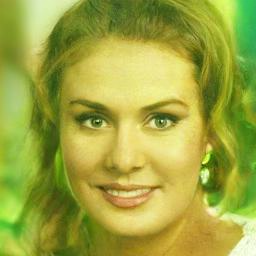

In [11]:
images[0]

The generated sample shows high-quality synthetic image capability.

Now let's examine the pipeline's internal components:

In [5]:
image_pipe

DDPMPipeline {
  "_class_name": "DDPMPipeline",
  "_diffusers_version": "0.35.1",
  "_name_or_path": "google/ddpm-celebahq-256",
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}

The pipeline contains two essential components: a scheduler (noise reduction algorithm) and a U-Net model (neural network predictions). Let's examine these building blocks in detail.

### Models

Models are neural networks that take noisy samples and timesteps as inputs to predict denoised outputs. We'll examine a `UNet2DModel` from the [DDPM Paper](https://arxiv.org/abs/2006.11239) trained on church images: [`google/ddpm-church-256`](https://huggingface.co/google/ddpm-church-256).

Load the model using the familiar `from_pretrained()` method:

In [ ]:
from diffusers import UNet2DModel

repo_id = "google/ddpm-church-256"
model = UNet2DModel.from_pretrained(repo_id)

The `from_pretrained()` method caches weights locally for faster subsequent loading. The model is a standard PyTorch `torch.nn.Module`:

In [17]:
model

UNet2DModel(
  (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=128, out_features=512, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=512, out_features=512, bias=True)
  )
  (down_blocks): ModuleList(
    (0-1): 2 x DownBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
          (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=512, out_features=128, bias=True)
          (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (downsamplers): ModuleList(
        (0): Downsample2D(
          (conv): Con

## Model Configuration

The model's architectural parameters are accessible via the `config` attribute:

In [18]:
model.config

FrozenDict([('sample_size', 256),
            ('in_channels', 3),
            ('out_channels', 3),
            ('center_input_sample', False),
            ('time_embedding_type', 'positional'),
            ('time_embedding_dim', None),
            ('freq_shift', 1),
            ('flip_sin_to_cos', False),
            ('down_block_types',
             ['DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'AttnDownBlock2D',
              'DownBlock2D']),
            ('mid_block_type', 'UNetMidBlock2D'),
            ('up_block_types',
             ['UpBlock2D',
              'AttnUpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D']),
            ('block_out_channels', [128, 128, 256, 256, 512, 512]),
            ('layers_per_block', 2),
            ('mid_block_scale_factor', 1),
            ('downsample_padding', 0),
            ('downsample_type', 'conv'),
   

The configuration is a frozen dictionary enforcing separation between architecture definition and inference-time attributes.

**Key Parameters:**
- `sample_size`: Input spatial dimensions (height × width)
- `in_channels`: Number of input channels  
- `down_block_types`/`up_block_types`: U-Net downsampling/upsampling components
- `block_out_channels`: Output channels for downsampling blocks
- `layers_per_block`: ResNet blocks per U-Net block

You can create identical architecture with random weights:

In [19]:
model_random = UNet2DModel(**model.config)

This creates a model with identical architecture but randomized weights.

## Save and Load Models

Use `save_pretrained()` to serialize both weights and configuration:

In [20]:
model_random.save_pretrained("my_model")

Reload using the same `from_pretrained()` method:

In [21]:
model_random = UNet2DModel.from_pretrained("my_model")

## Model Inference

For inference, create a random Gaussian sample with image tensor dimensions: (`batch_size` × `in_channels` × `sample_size` × `sample_size`).

In [22]:
import torch

torch.manual_seed(0)

noisy_sample = torch.randn(
    1, model.config.in_channels, model.config.sample_size, model.config.sample_size
)
noisy_sample.shape

torch.Size([1, 3, 256, 256])

## Forward Pass

Model inference requires the noisy sample and a `timestep`. The timestep indicates noise level (high values = more noise at start, low values = less noise at end).

**Important**: Check the [model card](https://huggingface.co/google/ddpm-church-256) for output interpretation. This model predicts noise residual.

In [23]:
with torch.no_grad():
    noisy_residual = model(sample=noisy_sample, timestep=2).sample

The predicted `noisy_residual` has identical dimensions to input. Verify output shape:

In [24]:
noisy_residual.shape

torch.Size([1, 3, 256, 256])

**Models** like `UNet2DModel` are parameterized neural networks trained to predict denoised samples or noise residuals. They're defined by `.config` and support Hub/local loading. Next: combining models with schedulers for complete image generation.

### Schedulers

**Schedulers** are algorithms that define noise injection (training) and removal (inference). Unlike models, schedulers are parameter-free and don't inherit from `torch.nn.Module`.

Load scheduler configurations using `from_config()`. We'll use `DDPMScheduler` from the [DDPM Paper](https://arxiv.org/abs/2006.11239).

In [25]:
from diffusers import DDPMScheduler

scheduler = DDPMScheduler.from_config(repo_id)

c:\Users\samir\OneDrive\Pessoal\Documentos\Atividades\Doutorado\diffmodels\diffusion_models_course\.venv\Lib\site-packages\diffusers\configuration_utils.py:250: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddpm.DDPMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)


Examine the scheduler configuration:

In [26]:
scheduler.config

FrozenDict([('num_train_timesteps', 1000),
            ('beta_start', 0.0001),
            ('beta_end', 0.02),
            ('beta_schedule', 'linear'),
            ('trained_betas', None),
            ('variance_type', 'fixed_small'),
            ('clip_sample', True),
            ('prediction_type', 'epsilon'),
            ('thresholding', False),
            ('dynamic_thresholding_ratio', 0.995),
            ('clip_sample_range', 1.0),
            ('sample_max_value', 1.0),
            ('timestep_spacing', 'leading'),
            ('steps_offset', 0),
            ('rescale_betas_zero_snr', False),
            ('_use_default_values',
             ['clip_sample_range',
              'thresholding',
              'rescale_betas_zero_snr',
              'dynamic_thresholding_ratio',
              'sample_max_value',
              'timestep_spacing',
              'steps_offset',
              'prediction_type']),
            ('_class_name', 'DDPMScheduler'),
            ('_diffusers_versi

**Key Parameters:**
- `num_train_timesteps`: Total denoising steps (noise → data)
- `beta_schedule`: Noise scheduling methodology  
- `beta_start`/`beta_end`: Minimum/maximum noise variance

Schedulers support `save_config()` and `from_config()` like models.

In [27]:
scheduler.save_config("my_scheduler")
new_scheduler = DDPMScheduler.from_config("my_scheduler")

## Scheduler Step Function

All schedulers provide `step()` methods for computing progressively denoised samples. They typically require model output, `timestep`, and current `noisy_sample`.

Apply the scheduler using model output from the previous section:

In [28]:
less_noisy_sample = scheduler.step(
    model_output=noisy_residual, timestep=2, sample=noisy_sample
).prev_sample
less_noisy_sample.shape

torch.Size([1, 3, 256, 256])

The computed sample maintains identical dimensions, enabling iterative processing.

## Complete Denoising Loop

Now we integrate all components in a complete denoising workflow with visualization. First, define a display function:

In [29]:
import PIL.Image
import numpy as np

def display_sample(sample, i):
    image_processed = sample.cpu().permute(0, 2, 3, 1)
    image_processed = (image_processed + 1.0) * 127.5
    image_processed = image_processed.numpy().astype(np.uint8)

    image_pil = PIL.Image.fromarray(image_processed[0])
    display(f"Image at step {i}")
    display(image_pil)

Move components to GPU for efficiency:

In [30]:
model.to("cuda")
noisy_sample = noisy_sample.to("cuda")

## DDPM Denoising Algorithm

The DDPM process follows two steps:
1. **Noise Prediction**: Model predicts noise residual  
2. **Sample Denoising**: Scheduler computes cleaner samples

Visualization occurs every 100 steps. The algorithm iterates over `scheduler.timesteps` from 1000 to 0. Execution takes ~1 minute on GPU.

 10%|▉         | 98/1000 [00:08<01:14, 12.09it/s]

'Image at step 100'

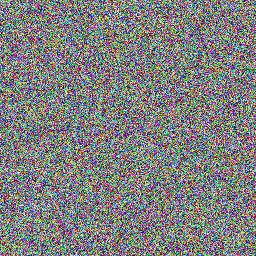

 20%|█▉        | 198/1000 [00:16<01:07, 11.94it/s]

'Image at step 200'

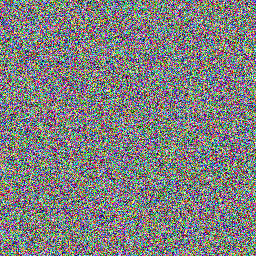

 30%|██▉       | 298/1000 [00:25<00:59, 11.82it/s]

'Image at step 300'

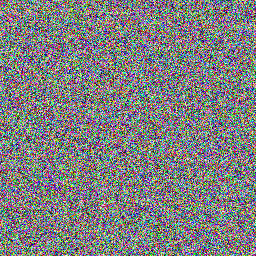

 40%|███▉      | 398/1000 [00:33<00:50, 11.84it/s]

'Image at step 400'

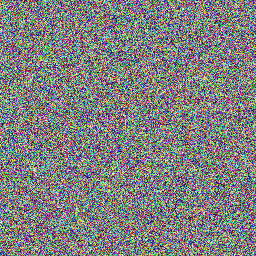

 50%|████▉     | 498/1000 [00:42<00:42, 11.80it/s]

'Image at step 500'

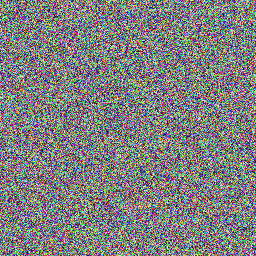

 60%|█████▉    | 598/1000 [00:50<00:34, 11.76it/s]

'Image at step 600'

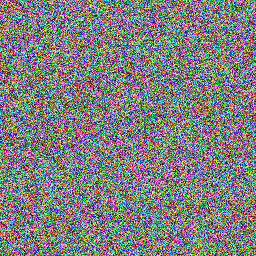

 70%|██████▉   | 698/1000 [00:58<00:25, 11.76it/s]

'Image at step 700'

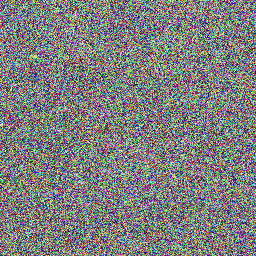

 80%|███████▉  | 798/1000 [01:07<00:17, 11.66it/s]

'Image at step 800'

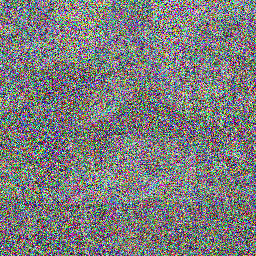

 90%|████████▉ | 898/1000 [01:16<00:08, 11.55it/s]

'Image at step 900'

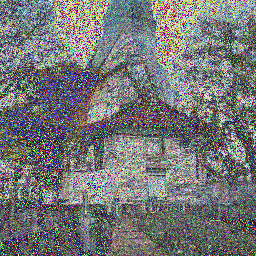

100%|█████████▉| 998/1000 [01:24<00:00, 11.65it/s]

'Image at step 1000'

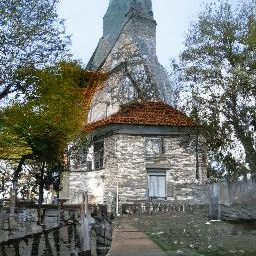

100%|██████████| 1000/1000 [01:25<00:00, 11.76it/s]


In [31]:
import tqdm

sample = noisy_sample

for i, t in enumerate(tqdm.tqdm(scheduler.timesteps)):
  # 1. predict noise residual
  with torch.no_grad():
      residual = model(sample, t).sample

  # 2. compute less noisy image and set x_t -> x_t-1
  sample = scheduler.step(residual, t, sample).prev_sample

  # 3. optionally look at image
  if (i + 1) % 100 == 0:
      display_sample(sample, i + 1)

The process requires substantial time (~800 steps) before coherent features emerge. For faster generation, we can use the [DDIM](https://arxiv.org/abs/2010.02502) scheduler.

**Scheduler Interoperability**: Different schedulers can work with the same models, though compatibility isn't universal. DDIM serves as an effective DDPM substitute.

## DDIM Scheduler

DDPM and DDIM schedulers share compatible configurations:

In [32]:
from diffusers import DDIMScheduler

scheduler = DDIMScheduler.from_config(repo_id)

c:\Users\samir\OneDrive\Pessoal\Documentos\Atividades\Doutorado\diffmodels\diffusion_models_course\.venv\Lib\site-packages\diffusers\configuration_utils.py:250: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddim.DDIMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)


DDIM allows dynamic timestep configuration. Reduce from 1000 to 50 steps for acceleration:

In [33]:
scheduler.set_timesteps(num_inference_steps=50)

Run the same denoising loop with DDIM:

 16%|█▌        | 8/50 [00:00<00:03, 12.50it/s]

'Image at step 10'

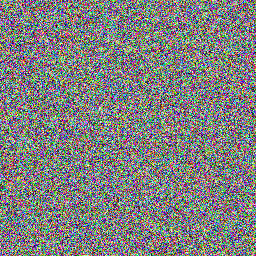

 36%|███▌      | 18/50 [00:01<00:02, 11.72it/s]

'Image at step 20'

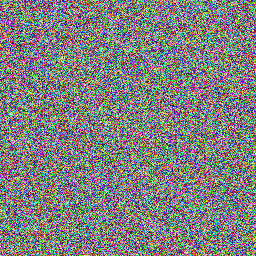

 56%|█████▌    | 28/50 [00:02<00:01, 11.73it/s]

'Image at step 30'

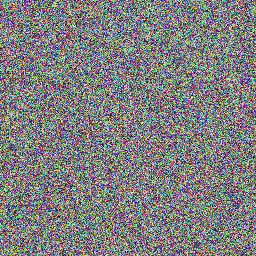

 76%|███████▌  | 38/50 [00:03<00:01, 11.74it/s]

'Image at step 40'

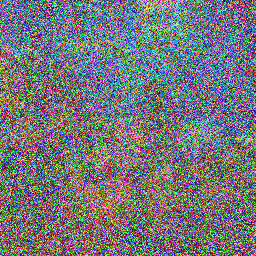

 96%|█████████▌| 48/50 [00:04<00:00, 11.93it/s]

'Image at step 50'

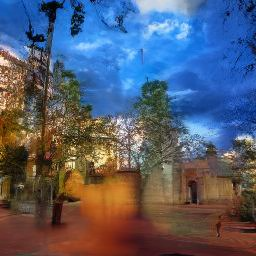

100%|██████████| 50/50 [00:04<00:00, 11.57it/s]


In [34]:
import tqdm

sample = noisy_sample

for i, t in enumerate(tqdm.tqdm(scheduler.timesteps)):
  # 1. predict noise residual
  with torch.no_grad():
      residual = model(sample, t).sample

  # 2. compute previous image and set x_t -> x_t-1
  sample = scheduler.step(residual, t, sample).prev_sample

  # 3. optionally look at image
  if (i + 1) % 10 == 0:
      display_sample(sample, i + 1)

DDIM demonstrates significant speedup (~2 seconds) with slight quality trade-off compared to full DDPM.

## Scheduler Summary

Key scheduler principles:
1. **Parameter-Free**: No trainable weights, pure algorithmic implementations
2. **Computational Role**: Define mathematical procedures for noise reduction

The `diffusers` library includes many schedulers with ongoing expansion. Check model documentation for compatibility. See [all schedulers](https://github.com/huggingface/diffusers/tree/main/src/diffusers/schedulers).

## Architectural Independence

Models and schedulers maintain deliberate separation: schedulers never accept models as inputs and vice versa.

**Functional Separation**:
- **Models**: Use trained parameters to predict noise residuals/denoised images  
- **Schedulers**: Use algorithms to compute previous timestep samples from model predictions

This separation enables flexible model-scheduler combinations while maintaining clear conceptual boundaries.